<a href="https://colab.research.google.com/github/Rishita32/Data_Science_Lab/blob/main/RishitaMote_Exp1_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing dataset
columns = ['checking account_status', 'Duration', 'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
           'employment', 'Installment rate', 'Personal status and sex', 'Other debtors / guarantors',
           'Present residence since', 'Property', 'Age', 'Other installment plans', 'Housing', 'existing credits',
           'Job', 'people being liable', 'Telephone', 'foreign worker', 'Risk']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', delimiter=' ', names=columns, header=0)

In [ ]:
df.head()

,checking account_status,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,employment,Installment rate,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,existing credits,Job,people being liable,Telephone,foreign worker,Risk
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1


### Data Preprocessing

In [ ]:
df.isna().sum()
#dataset has no missing values

checking account_status       0
Duration                      0
Credit history                0
Purpose                       0
Credit amount                 0
Savings account/bonds         0
employment                    0
Installment rate              0
Personal status and sex       0
Other debtors / guarantors    0
Present residence since       0
Property                      0
Age                           0
Other installment plans       0
Housing                       0
existing credits              0
Job                           0
people being liable           0
Telephone                     0
foreign worker                0
Risk                          0
dtype: int64

In [ ]:
unique_val = pd.DataFrame({'Variable': df.columns,'Classes': [df[i].nunique() for i in df.columns]})

unique_val = unique_val.sort_values('Classes', ascending=False) #sort in descending order of number of unique values.
unique_val = unique_val.reset_index(drop = True) # reset the index back to the default 0, 1, 2 etc indexes.
unique_val

,Variable,Classes
0,Credit amount,921
1,Age,53
2,Duration,33
3,Purpose,10
4,Credit history,5
5,Savings account/bonds,5
6,employment,5
7,checking account_status,4
8,Property,4
9,Job,4


In [ ]:
#converting "objects" column to categorical
cat_col = [col for col in df.columns if df[col].dtypes=='object']
for col in cat_col:
  df[col] = df[col].astype('category').cat.codes

df['Risk'] = df['Risk'].astype('category').cat.codes

In [ ]:
df.info()
#all object columns are converted to categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   checking account_status     999 non-null    int8 
 1   Duration                    999 non-null    int64
 2   Credit history              999 non-null    int8 
 3   Purpose                     999 non-null    int8 
 4   Credit amount               999 non-null    int64
 5   Savings account/bonds       999 non-null    int8 
 6   employment                  999 non-null    int8 
 7   Installment rate            999 non-null    int64
 8   Personal status and sex     999 non-null    int8 
 9   Other debtors / guarantors  999 non-null    int8 
 10  Present residence since     999 non-null    int64
 11  Property                    999 non-null    int8 
 12  Age                         999 non-null    int64
 13  Other installment plans     999 non-null    int8 
 14  Housing   

In [ ]:
# observing how each numerical data correlates with target variable risk
corr_matrix = df.corr()
corr_matrix["Risk"].sort_values(ascending=False)

Risk                          1.000000
Duration                      0.214326
Credit amount                 0.154326
Property                      0.141914
Installment rate              0.073052
Job                           0.032839
Present residence since       0.003656
Purpose                       0.001688
people being liable          -0.003297
Housing                      -0.019232
Other debtors / guarantors   -0.025342
Telephone                    -0.035704
existing credits             -0.045093
foreign worker               -0.082227
Personal status and sex      -0.087918
Age                          -0.089678
Other installment plans      -0.109577
employment                   -0.115253
Savings account/bonds        -0.178079
Credit history               -0.228159
checking account_status      -0.352022
Name: Risk, dtype: float64

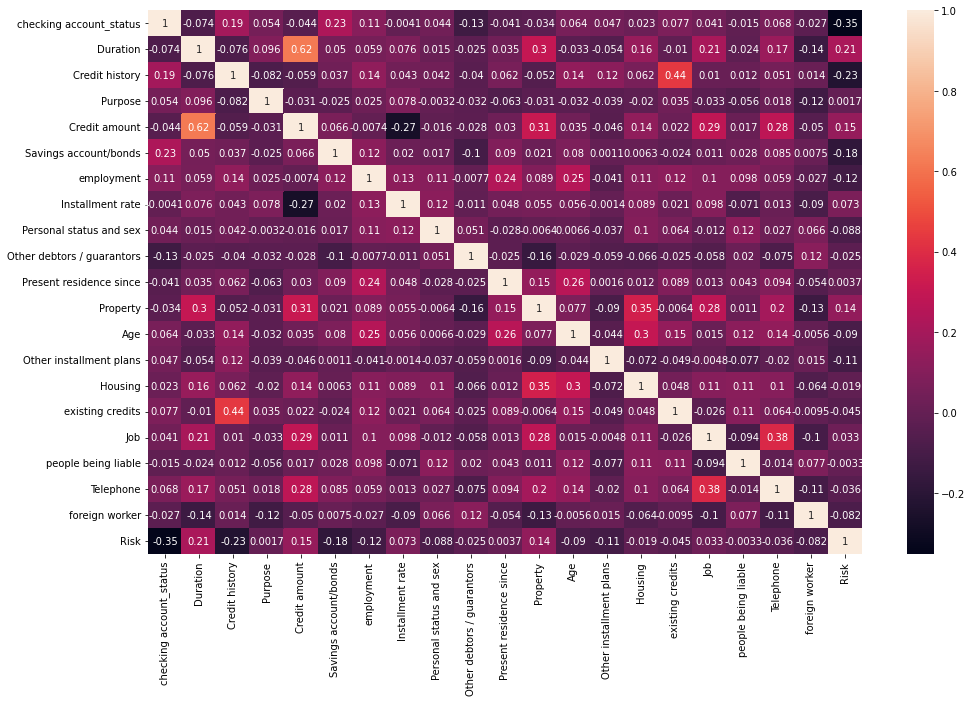

In [ ]:
#heatmap to understand the correlation
# correlation matrix
%matplotlib inline
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True)

#Observation: 'foreign worker' ,'Installment rate' ,'existing credits', 'Telephone' ,'Other debtors / guarantors' , '
#'Present residence since' ,'people being liable' ,'Purpose' have very low correlation with the target variable 'risk'. 

In [ ]:
#drop the columns with less correlation
df= df.drop(['foreign worker' ,'Installment rate'  ,'existing credits', 'Telephone','Other debtors / guarantors','Present residence since' ,'people being liable' ,'Purpose'],axis=1)

In [ ]:
df

,checking account_status,Duration,Credit history,Credit amount,Savings account/bonds,employment,Personal status and sex,Property,Age,Other installment plans,Housing,Job,Risk
0,1,48,2,5951,0,2,1,0,22,2,1,2,1
1,3,12,4,2096,0,3,2,0,49,2,1,1,0
2,0,42,2,7882,0,3,2,1,45,2,2,2,0
3,0,24,3,4870,0,2,2,3,53,2,2,2,1
4,3,36,2,9055,4,2,2,3,35,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,12,2,1736,0,3,1,0,31,2,1,1,0
995,0,30,2,3857,0,2,0,1,40,2,1,3,0
996,3,12,2,804,0,4,2,2,38,2,1,2,0
997,0,45,2,1845,0,2,2,3,23,2,2,2,1


### Data Visualisation

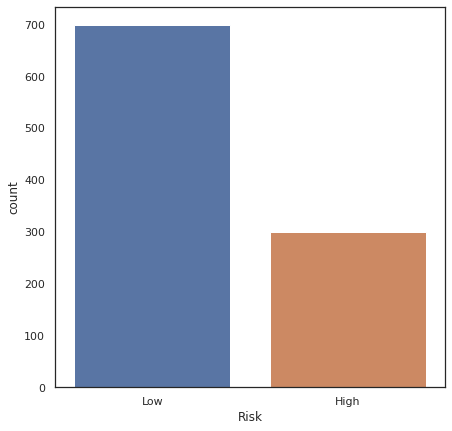

In [ ]:
#risk column info
fig = plt.figure(figsize =(7, 7))
graph = sns.countplot(data=df, x="Risk");
graph.set_xticklabels(['Low', 'High']);

#most of the samples are from low credit risk category. 

Text(0.5, 1.0, 'Impact on checking account status on risk ')

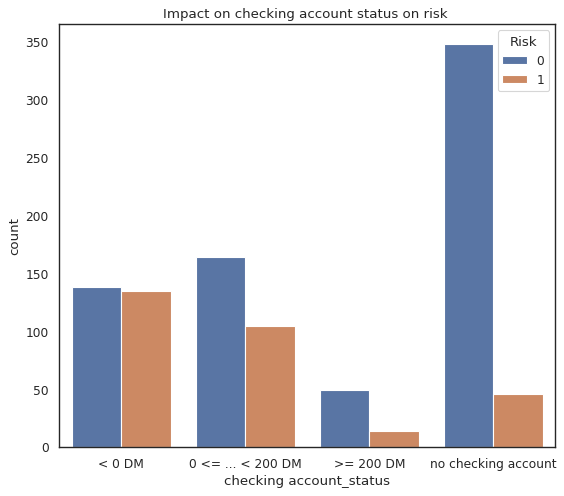

In [ ]:
# comparing the impact of each categorical feature with Risk
# 1. Checking Account Status and Risk
fig = plt.subplots(figsize=(8,7), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
graph=sns.countplot(x='checking account_status', hue = 'Risk',data = df)
graph.set_xticklabels(['< 0 DM', '0 <= ... < 200 DM', '>= 200 DM','no checking account']); 
graph.set_title('Impact of checking account status on risk ')

#Risk 0 --> Low Risk
#Risk 1 --> High Risk

#Observation: Users having no checking account have a low credit risk

Text(0.5, 1.0, 'Impact on Job on risk ')

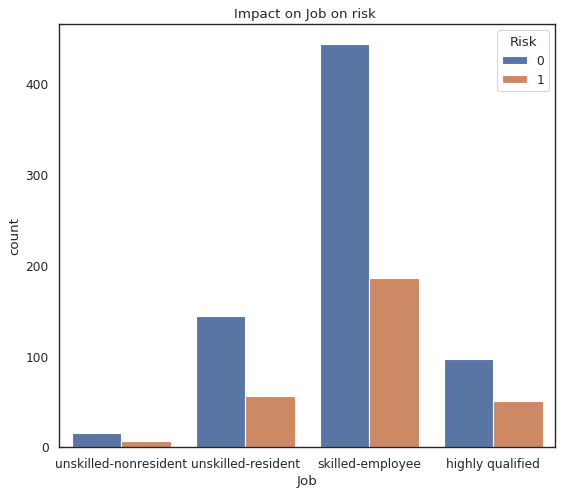

In [ ]:
#Job and Risk
fig = plt.subplots(figsize=(8,7), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
graph=sns.countplot(x='Job', hue = 'Risk',data = df)
graph.set_xticklabels(['unskilled-nonresident', 'unskilled-resident', 'skilled-employee','highly qualified']);
graph.set_title('Impact of Job on risk ')

#observation: Users who are skilled employees have Low Credit Risk.


Text(0.5, 1.0, 'Impact of Housing on risk ')

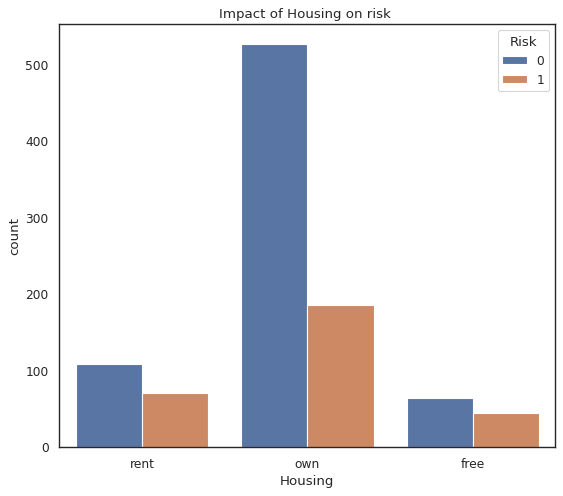

In [ ]:
#Housing and Risk
fig = plt.subplots(figsize=(8,7), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
graph=sns.countplot(x='Housing', hue = 'Risk',data = df)
graph.set_xticklabels(['rent', 'own', 'free']);  
graph.set_title('Impact of Housing on risk ')

#Observation: Users who have own housing experience Low Credit Risk.

Text(0.5, 1.0, 'Impact of Duration (in months) on risk ')

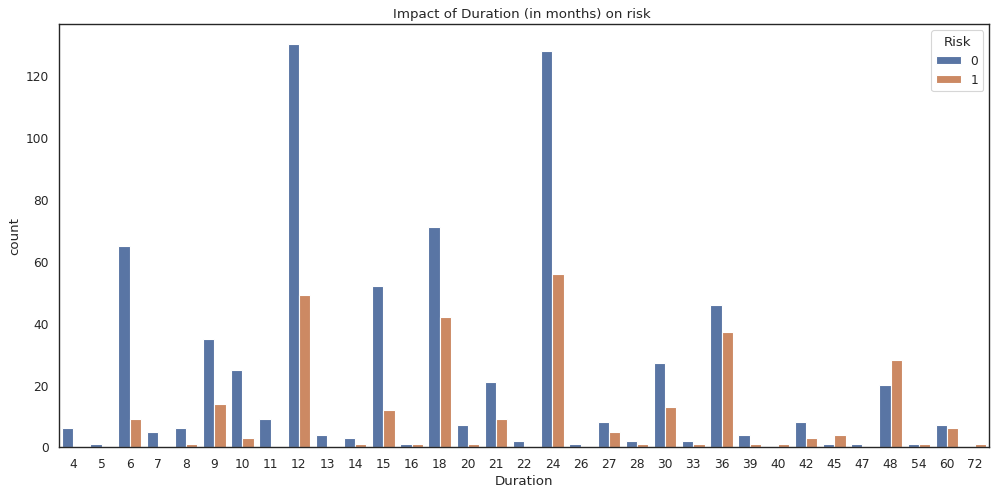

In [ ]:
#Duration and Risk
fig = plt.subplots(figsize=(15,7), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
graph=sns.countplot(x='Duration', hue = 'Risk',data = df)  
graph.set_title('Impact of Duration (in months) on risk ')

#Observation: There is no clear relationship between duration and risk. However, I observed that for duration 12 and 24 months, the risk is low!

Text(0.5, 1.0, 'Impact of Age on risk ')

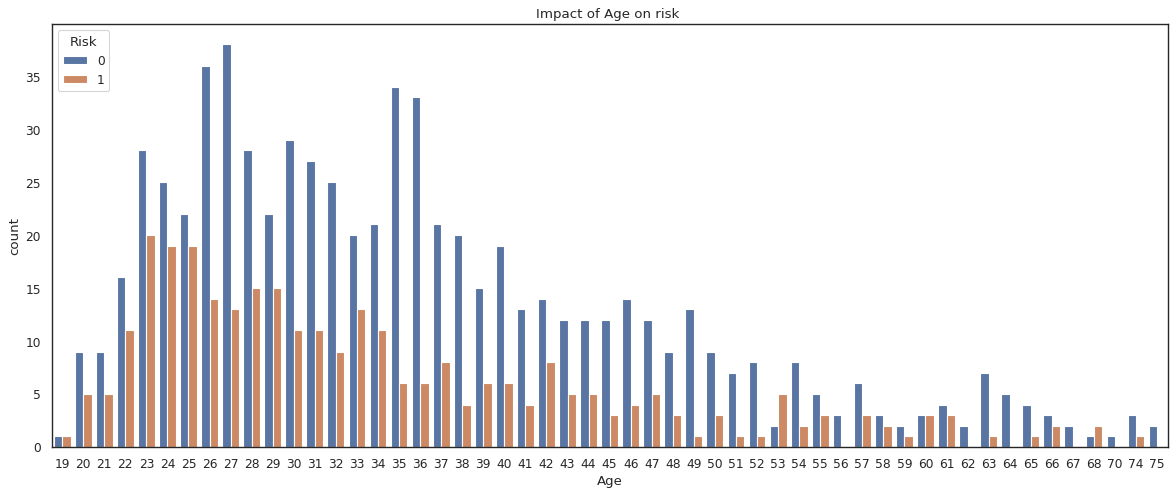

In [ ]:
#Age and Risk
fig = plt.subplots(figsize=(18,7), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
graph=sns.countplot(x='Age', hue = 'Risk',data = df)  
graph.set_title('Impact of Age on risk ')

#Observation: The credit risk starts increasing from the age 22 till 33-34. 


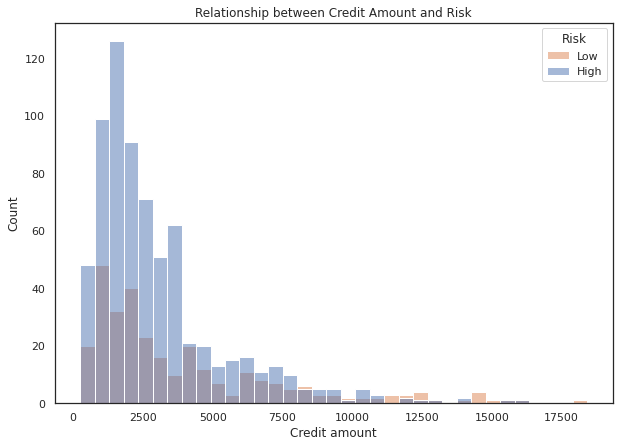

In [ ]:
#credit amount and risk
fig = plt.figure(figsize =(10, 7))
_ = sns.histplot(data = df, x = 'Credit amount', hue="Risk")
plt.legend(title='Risk',  labels=['Low','High']); 
_ = plt.title('Relationship between Credit Amount and Risk')

#Observation: The risk is high between the credit range 1000-2500. 


Text(0.5, 1.0, 'Impact of Credit History on risk ')

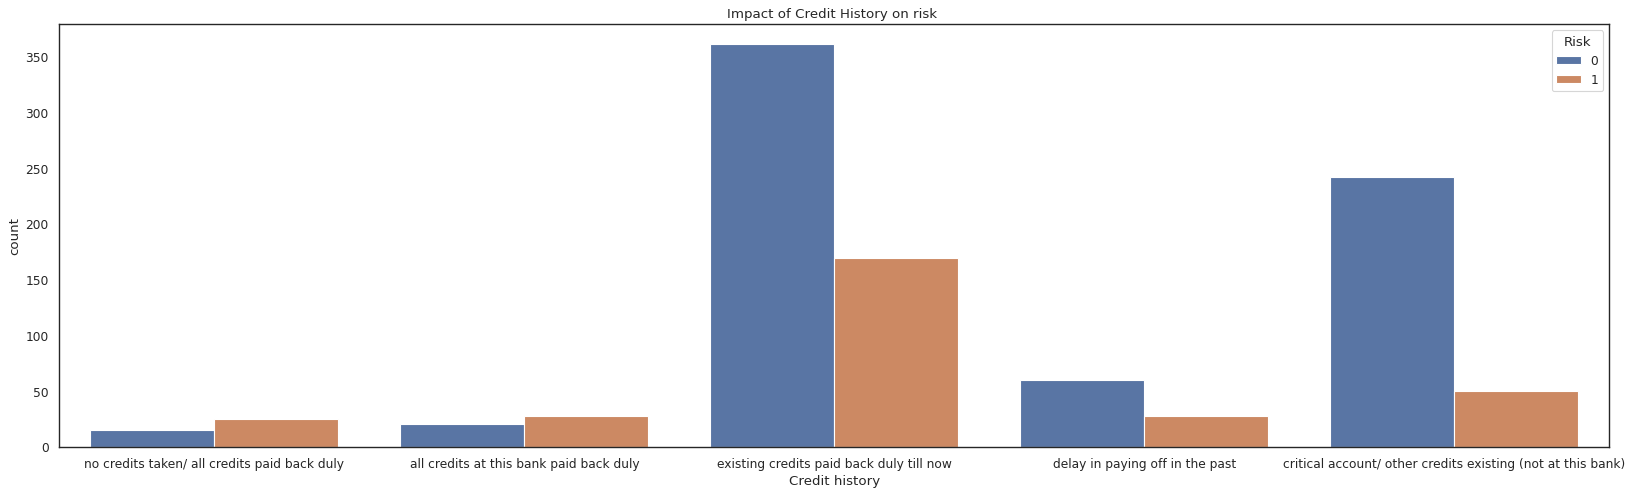

In [ ]:
#credit history and risk
fig = plt.subplots(figsize=(25,7), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
graph=sns.countplot(x='Credit history', hue = 'Risk',data = df)
graph.set_xticklabels(['no credits taken/ all credits paid back duly','all credits at this bank paid back duly','existing credits paid back duly till now','delay in paying off in the past','critical account/ other credits existing (not at this bank)']); 
graph.set_title('Impact of Credit History on risk ')

#Observation: Users whose existing credits are paid back duly till now have low credit risk. 


### Converting categorical features to numeric 

In [ ]:
#converting categorical to numerical using one hot encoding
features_cat = ['checking account_status','Credit history','Savings account/bonds', 'employment','Property','Other installment plans','Housing','Job','Personal status and sex']

df = pd.get_dummies(df, columns = features_cat)
df

,Duration,Credit amount,Age,Risk,checking account_status_0,checking account_status_1,checking account_status_2,checking account_status_3,Credit history_0,Credit history_1,Credit history_2,Credit history_3,Credit history_4,Savings account/bonds_0,Savings account/bonds_1,Savings account/bonds_2,Savings account/bonds_3,Savings account/bonds_4,employment_0,employment_1,employment_2,employment_3,employment_4,Property_0,Property_1,Property_2,Property_3,Other installment plans_0,Other installment plans_1,Other installment plans_2,Housing_0,Housing_1,Housing_2,Job_0,Job_1,Job_2,Job_3,Personal status and sex_0,Personal status and sex_1,Personal status and sex_2,Personal status and sex_3
0,48,5951,22,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,12,2096,49,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,42,7882,45,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,24,4870,53,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,36,9055,35,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,12,1736,31,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
995,30,3857,40,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
996,12,804,38,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
997,45,1845,23,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


###Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = df.drop(columns='Risk')
Y = df[['Risk']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

### Normalisation

In [ ]:
# Normalization using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

###Build the model (use scikit learn)

In [ ]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

###Summarise the model

In [ ]:
regressor.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Prediction

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
lr_score=regressor.score(X_test, y_test)
print("The accuracy  is: " ,lr_score)

The accuracy  is:  0.69


### Evaluate the model

In [ ]:
#classification report 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.79       128
           1       0.63      0.33      0.44        72

    accuracy                           0.69       200
   macro avg       0.67      0.61      0.61       200
weighted avg       0.68      0.69      0.66       200

[[114  14]
 [ 48  24]]


### Tuning the model

In [ ]:
grid = [
  {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
  {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'], 'solver': ['lbfgs','newton-cg', 'sag']}
 ]

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid_search = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f"Best Params: {grid_result.best_params_}")

Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
#selecting the best params and traning the model 
regressor = LogisticRegression(C= 0.1, penalty ='l2', solver = 'newton-cg')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 67)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, solver='newton-cg')

In [ ]:
print(f'Accuracy on Test data after tuning: {round(regressor.score(X_test, y_test), 4) *100} %')

Accuracy on Test data after tuning: 79.0 %


# Conclusion: 


1.   I understood logistic and linear regression and was able to implement it on a real world problem. 
2.   I learned that linear regression has no hyperparameters hence it cannot be tuned. 
3.   I also understood that to evaluate linear regression model, classification report is not supported as classification report is used where the prediction can be either right or wrong.  
4.   I learned to visualize the pair plot, identify the skewed features, and features that are categorical.
5. I also understood that performing logarithmic transformation on skewed variable helps in increasing the accuracy of the model.    

